# Лабораторная работа №8.
# РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ
# Вариант 27

Работа студента группы А-13а-19

Башлыкова Матвея

**Задача 8.1.**

Найти аналитическое и приближенное решения краевой задачи

$$
\begin{cases} -u'' + pu' + qu = f(x), a <= x <= b\\u(a) = u_a\\u(b) = u_b \end{cases}
$$

$$
\begin{cases} -u'' - 2u' + 8u = -5x^2 + 8x - 30, 0 <= x <= 2\\u(0) = -5\\u(2) = 0 \end{cases}
$$

с заданным шагом h. Решение системы разностных уравнений найти c помощью метода прогонки
                             
**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**

**1.** Найти аналитическое решение задачи.

Найдём однородное решение:
$$-λ^2 - 2λ + 8 = 0$$
$$λ = 2; -4$$
$$y_о = C_1e^{2x} + C_2e^{-4x}$$

Найдём частное решение:
$$y_{чн} = Ax^2 + Bx + C$$
$$y_{чн}' = 2Ax + B$$
$$y_{чн}'' = 2A$$
$$-2A - 4Ax - 2B + 8Ax^2 + 8Bx + 8C = -5x^2 + 8x - 30$$
$$A = -0.625$$
$$B = 0.6875$$
$$C = -3.734375$$

Получим общее решение:
$$y_{он} = -0.625x^2 + 0.6875x - 3.734375 + C_1e^{2x} + C_2e^{-4x}$$

Найдём C_1 и C_2 из краевых условий:
$$
\begin{cases} y_{он}(0) = -5\\y_{он}(2) = 0\end{cases}
$$

$$
\begin{cases} C_1 + C_2 - 3.734375 = -5\\C_1e^{4} + C_2e^{-8} - 4.859375 = 0\end{cases}
$$

$$C_1 = 0.08901088; C_2 = -1.35463588$$

Аналитическое решение задачи:
$$y_{он} = -0.625x^2 + 0.6875x - 3.734375 + 0.08901088e^{2x} + -1.35463588e^{-4x}$$

**2.** Cоставить разностную схему и выписать коэффициенты матрицы системы уравнений и коэффициенты правой части.

Разностная схема:
$$-\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - 2\frac{u_{i+1} - u_{i-1}}{2h} + 8u_i = -5x_i^2 + 8x_i - 30$$
$$u_{i-1}(-1 + h) + u_i(2 + 8h^2) + u_{i+1}(-1-h) = h^2(-5x_i^2 + 8x_i - 30)$$

Имеем трёхдиагональную матрицу:
$$
\left(\begin{array}{cc} 
1 & 0 & ... & ... & 0\\
... & ... & ... & ... & ...\\
... & -1 + h & 2 + 8h^2 & -1-h & ...\\
... & ... & ... & ... & ...\\
0 & ... & ... & 0 & 1\\
\end{array}\right)
$$

И вектор правой части:
$$
\left(\begin{array}{cc} 
-5\\ 
...\\
h^2(-5x_i^2 + 8x_i - 30)\\
...\\
0\\
\end{array}\right)
$$ 

**3.** Найти решение задачи по разностной схеме с точностью 0.001.

**4.** Построить на одном чертеже графики приближенного и аналитического решений, и график погрешности.

Напишем функции:

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция правой части.
def fun(x):
    return -5 * x**2 + 8 * x - 30

# Аналитическое решение.
def AnalyticSolution(x):
    return -0.625*x**2 + 0.6875*x - 3.734375 + 0.08901088 * np.exp(2*x) - 1.35463588 * np.exp(-4*x)

In [38]:
# Коэффициент при u_i-1.
def GetULeft(h):
    return -1 + h

# Коэффициент при u_i.
def GetUCent(h):
    return 2 + 8 * h**2

# Коэффициент при u_i+1.
def GetURight(h):
    return -1 - h

# Значение вектора.
def GetY(h, point):
    return h**2 * fun(point)

# Получение трёхдиагональной матрицы при шаге h
# в виде трёх массивов диагоналей
# и вектора правой части.
def GetTridiagonal(a, b, ua, ub, h):
    number_of_points = int((b - a) / h) + 1
    left = np.full(number_of_points, GetULeft(h))
    left[0] = left[number_of_points - 1] = 0
    cent = np.full(number_of_points, GetUCent(h))
    cent[0] = cent[number_of_points - 1] = 1
    right = np.full(number_of_points, GetURight(h))
    right[0] = right[number_of_points - 1] = 0
    points = np.zeros(number_of_points)
    Y = np.zeros(number_of_points)
    Y[0] = ua
    Y[number_of_points - 1] = ub
    points[0] = a
    points[number_of_points - 1] = b
    for i in range(1, number_of_points - 1):
        points[i] = a + h * i
        Y[i] = GetY(h, points[i])
    return points, left, cent, right, Y

# Решение для построенной трёхдиагональной матрицы
# и вектора правой части
def SolveTridiagonal(left, cent, right, Y, a, b, h):
    number_of_points = int((b - a) / h) + 1
    alpha = np.zeros(number_of_points - 1)
    beta = np.zeros(number_of_points - 1)
    alpha[0] = -right[0]/cent[0]
    beta[0] = Y[0]/cent[0]
    
    result = np.zeros(number_of_points)

    for i in range(1, number_of_points - 1):
        alpha[i] = -right[i]/(cent[i] + left[i] * alpha[i - 1])
        beta[i] = (Y[i] - left[i] * beta[i - 1])/(cent[i] + left[i] * alpha[i - 1])
    
    result[number_of_points - 1] = (Y[number_of_points - 1] - left[number_of_points - 1] * beta[number_of_points - 2])/(cent[number_of_points - 1] + left[number_of_points - 1] * alpha[number_of_points - 2])
    for i in reversed(range(number_of_points - 1)):
        result[i] = result[i + 1] * alpha[i] + beta[i]
    
    return result

# Функция, находящая решение для конкретного шага.
# Строит матрицу и получает решение.
def SolveForH(a, b, ua, ub, h):
    points, left, cent, right, Y = GetTridiagonal(a, b, ua, ub, h)
    return points, SolveTridiagonal(left, cent, right, Y, a, b, h)

# Правило Рунге.
def Runge(u_h, u_2h, p):
    lim = len(u_2h)
    res = 0
    for i in range(lim):
        if abs((u_h[2 * i] - u_2h[i])/(2**p - 1)) > res:
            res = abs((u_h[2 * i] - u_2h[i])/(2**p - 1))
    return res

# Нахождение решения, удовлетворяющего точности.
def SolveByError(a, b, ua, ub, eps):
    h = 0.25
    x_h, u_h = SolveForH(a, b, ua, ub, h)
    x_2h, u_2h = SolveForH(a, b, ua, ub, 2 * h)
    while(Runge(u_h, u_2h, 2) >= eps):
        h /= 2
        x_2h, u_2h = x_h, u_h
        x_h, u_h = SolveForH(a, b, ua, ub, h)
    h /= 2
    x_h, u_h = SolveForH(a, b, ua, ub, h)
    return x_h, u_h

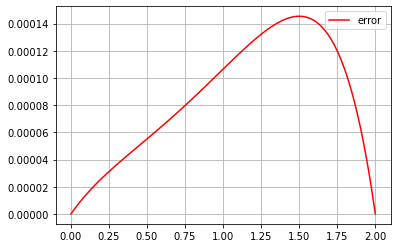

In [39]:
# Зададим коэффициенты варианта
a = 0
b = 2
p = -2
q = 8
u_a = -5
u_b = 0
eps = 0.001

# Найдём решение и построим графики:
x_h, u_h = SolveByError(a, b, u_a, u_b, eps)
analytic = AnalyticSolution(x_h)
plt.plot(x_h, abs(u_h - analytic), color = 'red', label = 'error')
plt.legend()
plt.grid()
plt.show()

Таким образом, мы получили решение, которое даёт погрешность меньше 0.001.

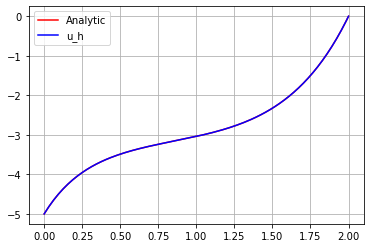

In [40]:
plt.plot(x_h, analytic, color = 'red', label = 'Analytic')
plt.plot(x_h, u_h, color = 'blue', label = 'u_h')
plt.legend()
plt.grid()
plt.show()

Как мы видим, графики аналитического решения и приближённого визуально совпали

**Задача 8.2.** Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка x0 стержня имела максимальную температуру?

Математически задача формулируется следующим образом: найти приближенное решение краевой задачи

$$
\begin{cases} -(k(x)u')' + qu = f(x), a <= x <= b\\u(a) = u_a\\u(b) = u_b \end{cases}
$$

$$
k(x) = \begin{cases} k_1(x), 0 <= x <= 1\\k_2(x), 1 < x <= 2\\k_3(x), 2 < x <= 3 \end{cases}
$$

при каждой конфигурации стержня. Значения q и f(x) из 8.1

Сравнить полученные значения температуры в фиксированной точке в каждом варианте. Выбрать оптимальный результат.

Подставив значения для варианта, получим:

$$
\begin{cases} -(k(x)u')' + 8u = -5x^2 + 8x - 30, 0 <= x <= 3\\u(0) = 0\\u(3) = 0 \end{cases}
$$

$$
k(x) = \begin{cases} 19, 0 <= x <= 1\\x + 3.5, 1 < x <= 2\\x^{1/3} + 0.2, 2 < x <= 3 \end{cases}
$$

Сравнивать значения температуры будем в точке $$x_0 = 0.7$$

**1.** Составить подпрограмму, вычисляющую функцию из индивидуального варианта.

Составим подпрограммы для вычисления k(x), а также подпрограммы, необходимые для нахождения решения.

In [43]:
# 8.2.27

def k1(x):
    return 19

def k2(x):
    return x + 3.5

def k3(x):
    return x**(1/3.0) + 0.2

# При передаче функций в нужном порядке генерируем
# нужную конфигурацию функции k(x)
def kForInterval(k_1, k_2, k_3, x):
    if 0 <= x and x <= 1:
        return k_1(x)
    elif 1 < x and x <= 2:
        return k_2(x)
    else:
        return k_3(x)

# Немного переделали прошлую функцию, т.к. теперь у нас значения
# в диагоналях не одинаковы.
def GetTridiagonal_2(a, b, ua, ub, h, k_1, k_2, k_3):
    number_of_points = int((b - a) / h) + 1
    left = np.zeros(number_of_points)
    left[0] = left[number_of_points - 1] = 0
    cent = np.zeros(number_of_points)
    cent[0] = cent[number_of_points - 1] = 1
    right = np.zeros(number_of_points)
    right[0] = right[number_of_points - 1] = 0
    points = np.zeros(number_of_points)
    Y = np.zeros(number_of_points)
    Y[0] = ua
    Y[number_of_points - 1] = ub
    points[0] = a
    points[number_of_points - 1] = b
    for i in range(1, number_of_points - 1):
        points[i] = a + h * i
        left[i] = -1 * kForInterval(k_1, k_2, k_3, points[i] - h/2)
        cent[i] = 8 * h**2 + kForInterval(k_1, k_2, k_3, points[i] - h/2) + kForInterval(k_1, k_2, k_3, points[i] + h/2)
        right[i] = -1 * kForInterval(k_1, k_2, k_3, points[i] + h/2)
        Y[i] = GetY(h, points[i])
    return points, left, cent, right, Y

# Соответсвенно переделали и эту функцию.
def SolveForH_2(a, b, ua, ub, h, k_1, k_2, k_3):
    points, left, cent, right, Y = GetTridiagonal_2(a, b, ua, ub, h, k_1, k_2, k_3)
    return points, SolveTridiagonal(left, cent, right, Y, a, b, h)

**2.** Для каждого варианта конфигурации стержня произвести расчет по разностной схеме с шагом

**3.** Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня.

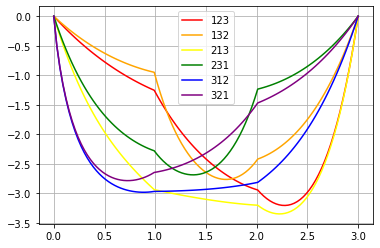

In [44]:
a_2 = 0
b_2 = 3
u_a_2 = 0
u_b_2 = 0
h_2 = (b_2 - a_2) / 100

x_h_2, u_h_123 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k1, k2, k3)
x_h_2, u_h_132 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k1, k3, k2)
x_h_2, u_h_213 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k2, k1, k3)
x_h_2, u_h_231 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k2, k3, k1)
x_h_2, u_h_312 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k3, k1, k2)
x_h_2, u_h_321 = SolveForH_2(a_2, b_2, u_a_2, u_b_2, h_2, k3, k2, k1)
#analytic = AnalyticSolution(x_h)
#print(abs(u_h[0] - analytic[0]))
#print(u_h[0])
#print(analytic[0])
plt.plot(x_h_2, u_h_123, color = 'red', label = '123')
plt.plot(x_h_2, u_h_132, color = 'orange', label = '132')
plt.plot(x_h_2, u_h_213, color = 'yellow', label = '213')
plt.plot(x_h_2, u_h_231, color = 'green', label = '231')
plt.plot(x_h_2, u_h_312, color = 'blue', label = '312')
plt.plot(x_h_2, u_h_321, color = 'purple', label = '321')
plt.legend()
plt.grid()
plt.show()

**4.** Сравнив полученные решения, выбрать оптимальный результат.

Как мы видим, среди наших графиков график конфигурации 132 расположен выше остальных в промежутке $$[0.5, 1.0]$$, следовательно и в самой точке $$x_0 = 0.7$$ для данной конфигурации температура будет максимальна.

Следовательно, имеем функцию распределения коэффициентов теплопроводности:

$$
k(x) = \begin{cases} 19, 0 <= x <= 1\\x^{1/3} + 0.2, 1 < x <= 2\\x + 3.5, 2 < x <= 3 \end{cases}
$$

### Итог

**1.** Мы решили краевую задачу аналитически и методом конечных разностей с использованием метода прогонки и нам удалось достичь требуемой точности.

**2.** Аналогично, применили метод прогонки для решения краевой задачи для уравнения с переменным коэффициентом теплопроводности. Проверив различные конфигурации, мы нашли оптимальный результат.